Module 2, Lab 1 - Sampling
==========================

In this lab, we will see how random samples (and the data analyses that
come from them) estimate the populations they come from.

This bears repeating: when you are working with a sample of data, you
are using that as an estimate of the population that generated it.

So, how good are your estimations? In working with professionals and
students alike, I tend to find that our human intuitions are often
wrong. However, we can play with sampling ourselves and see the results.

First, we should set the seed. A seed is set using the `seed` function from the Numpy.random Python package. This function initializes the random number generation on your computer as mine, so that we should get the same
results.

In [1]:
import numpy.random as nr
nr.seed(12345)

To generate a random sample that is normally distributed, we use the
`normal(mean, std, n)`. For example, 50 responses from a population with a
mean of 10 and standard deviation of 2 are:

In [2]:
nr.normal(10, 2, 50)

array([ 9.59058468, 10.95788668,  8.96112257,  8.88853939, 13.93156115,
       12.78681167, 10.18581575, 10.56349231, 11.53804514, 12.49286947,
       12.01437872,  7.40755778, 10.54998327, 10.45782576, 12.70583367,
       11.77285868,  5.99672538,  9.25631493, 13.33805062,  9.12286053,
        8.92051711, 10.95397002, 16.49788784,  7.95754495,  8.84582539,
       10.24824255, 10.60522712, 11.04754414, 10.00188056, 12.68761959,
        8.57291203,  8.33769292,  5.25953669,  6.27847842,  8.2784852 ,
       11.12029059,  7.46813102, 10.23965425,  7.8729751 , 10.66576543,
        5.28116239,  9.60091409,  6.91600894,  8.05852818,  7.3859395 ,
       10.57269949, 10.75596822,  8.49222693, 10.6625713 , 12.69948443])

A Numpy array with the Normally distributed values is returned. 

We can also do something similar with a binomial distribution (data can
have two outcomes, such as "like" and "don't like" a product). Here is
the code which uses: `binomial(n, prob, size=1)`. The `prob` argument represents
the likelihood of getting a `1` as opposed to a `0`. The size argument
changes the nature of the distribution in a way I won't discuss here. If
we want to simulate 50 responses from a population in which 30% of
people like your product (`1`) and 70% do not (`0`), we use:

In [3]:
nr.seed(3344)
nr.binomial(1, 0.3, 50)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1])

In this case, each `1` represents someone who likes your product and
each `0` represents someone who does not.

There are many distributions we can use with many shapes, including
distributions that have skew, distributions that can resemble counts of
things (e.g., only discrete numbers, most scores zero). We will stick
with these two for this lab.

"Like" vs "Dislike"
===================

Let's try the example above in which each `1` represents someone who
likes your product and each `0` represents someone who does not.

This time, I will run the sample and save the result.

In [4]:
nr.seed(3344)
sample1 = nr.binomial(1, 0.3, 50)

Now we can examine how well our sample did. In this case we *know* the population value was 30%, because we specified that parameter when we ran the code. How close did it get to our true value of 30%? To answer this question execute the `itemfreq` function from the `scipy.stats` module.

In [5]:
from scipy import stats
print(stats.itemfreq(sample1))

[[ 0 37]
 [ 1 13]]


C:\Users\pwy_9\AppData\Local\Temp/ipykernel_5168/2256282466.py:2: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  print(stats.itemfreq(sample1))


There are 13 likes and 37 dislikes. We can convert to
percentages by diving by the sum of likes and dislikes:

In [6]:
13.0/(13.0 + 37.0)

0.26

Our sample underestimated the number of people who like the product,
returning "26%" instead of 30%.

Because the data are coded `0` and `1`, we can also trick the math into
returning a proportion by using `mean()` from Numpy:

In [7]:
import numpy as np
np.mean(sample1)

0.26

Let's try this several times. Every time I run the code, a random sample
will be collected, the proportion of people who like the product
calculated, and reported to you.

In [8]:
print(np.mean(nr.binomial(1, 0.3, 50)))
print(np.mean(nr.binomial(1, 0.3, 50)))
print(np.mean(nr.binomial(1, 0.3, 50)))
print(np.mean(nr.binomial(1, 0.3, 50)))
print(np.mean(nr.binomial(1, 0.3, 50)))
print(np.mean(nr.binomial(1, 0.3, 50)))

0.3
0.28
0.3
0.28
0.4
0.26


We see here that our samples are varying quite a bit. We can run many of
these by using a list comprehension. Let's try this 100 times. I assume you are
familiar with list comprehensions in Python.

In [9]:
nr.seed(9977)
results = [np.mean(nr.binomial(1, 0.3, 50)) for _ in range(100)]
print(results)

[0.36, 0.28, 0.28, 0.26, 0.24, 0.28, 0.3, 0.22, 0.34, 0.14, 0.18, 0.24, 0.24, 0.38, 0.36, 0.34, 0.34, 0.32, 0.3, 0.28, 0.22, 0.32, 0.34, 0.34, 0.36, 0.36, 0.3, 0.26, 0.26, 0.32, 0.2, 0.2, 0.14, 0.34, 0.22, 0.34, 0.34, 0.22, 0.18, 0.22, 0.26, 0.36, 0.4, 0.24, 0.3, 0.42, 0.3, 0.22, 0.36, 0.32, 0.3, 0.24, 0.34, 0.26, 0.26, 0.36, 0.18, 0.34, 0.28, 0.28, 0.28, 0.32, 0.3, 0.34, 0.24, 0.32, 0.26, 0.26, 0.42, 0.18, 0.32, 0.3, 0.4, 0.42, 0.26, 0.3, 0.26, 0.38, 0.28, 0.4, 0.36, 0.22, 0.2, 0.16, 0.34, 0.38, 0.48, 0.3, 0.24, 0.36, 0.38, 0.16, 0.32, 0.34, 0.24, 0.26, 0.38, 0.3, 0.28, 0.22]


We see considerable variance in these results. We can histogram them to
see it better:

Text(0.5, 1.0, 'Histogram of results')

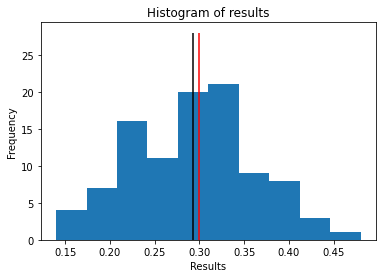

In [10]:
# So the plot appears in line in the noteboook
%matplotlib inline 

sample_mean = np.mean(results)
import matplotlib.pyplot as plt
plt.hist(results)
plt.vlines(0.3, 0.0, 28.0, color = 'red')
plt.vlines(sample_mean, 0.0, 28.0, color = 'black')
plt.xlabel('Results') 
plt.ylabel('Frequency')
plt.title('Histogram of results')

We see here that, on average, random samples are trustworthy--after all,
they are tending toward 30%. However, *individual* samples are
less trustworthy. Some results are nearly as large as 135% or as low as
50%. Yikes!

We can also subtract .30 from each score to re-score them as the degree
of error in each sample.

In [11]:
results_error = [round(x - 0.3, 2) for x in results]
print(results_error)

[0.06, -0.02, -0.02, -0.04, -0.06, -0.02, 0.0, -0.08, 0.04, -0.16, -0.12, -0.06, -0.06, 0.08, 0.06, 0.04, 0.04, 0.02, 0.0, -0.02, -0.08, 0.02, 0.04, 0.04, 0.06, 0.06, 0.0, -0.04, -0.04, 0.02, -0.1, -0.1, -0.16, 0.04, -0.08, 0.04, 0.04, -0.08, -0.12, -0.08, -0.04, 0.06, 0.1, -0.06, 0.0, 0.12, 0.0, -0.08, 0.06, 0.02, 0.0, -0.06, 0.04, -0.04, -0.04, 0.06, -0.12, 0.04, -0.02, -0.02, -0.02, 0.02, 0.0, 0.04, -0.06, 0.02, -0.04, -0.04, 0.12, -0.12, 0.02, 0.0, 0.1, 0.12, -0.04, 0.0, -0.04, 0.08, -0.02, 0.1, 0.06, -0.08, -0.1, -0.14, 0.04, 0.08, 0.18, 0.0, -0.06, 0.06, 0.08, -0.14, 0.02, 0.04, -0.06, -0.04, 0.08, 0.0, -0.02, -0.08]


We see here that most sample scores are within about 5% of the true
population value value. Still, depending on what we want to do with the
data, that could be unacceptably large. The property of samples to
"mis-estimate" the population is called sampling error and it is clearly
a big problem, leading to many a bad decision. The degree to which your
individual samples tend to "mis-estimate" the population (shown above:
`results_error`) is something we want to estimate. Typically, we
quantify this by taking the standard deviation of these errors. This is
called "standard error", and it is a single number, how far "off" our
samples tend to be, on average:

In [12]:
np.std(results_error)

0.0684721841334129

Aha, so we see that the average sample is "off" from the population
value by 6%. Some are "off" by more; some are "off" by less, but the
average sample is off by 6%. In other words, our standard error is 6%.

Fun fact: you can also estimate the standard error with a simple
equation. For binomial data (`0` and `1` scores), the equation is:

$$se = \sqrt{\frac{p\left ( 1-p \right )}{n-1}}$$
 Here, p is the percentage in the population. So, plugging in our
values:

In [13]:
import math
math.sqrt((.30*(1-.3))/(50-1))

0.06546536707079771

This is convenient, because it tells us that we don't really need to run
simulations like the above to know how trustworthy our samples are. In
fact, plugging in a reasonable guess for the population value and a
sample size, we can know *before we run a study* how trustworthy a
typical sample will be.

Clearly, a large standard error is a bad thing. We can reduce this
problem by relying on a larger sample. For example, try using a sample
of 700 in the equation for standard error shown previously:

In [14]:
math.sqrt((.30*(1-.3))/(700-1))

0.01733289313846238

We see now that the typical sample will be off by only 1.7% from the
population value. We can run a similar loop as done before and see this
in action:

0.0183828669123825


Text(0.5, 1.0, 'Histogram of results')

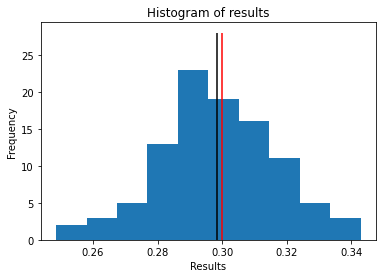

In [15]:
nr.seed(4466)
results = [np.mean(nr.binomial(1, 0.3, 700)) for _ in range(100)]

print(np.std(results))

sample_mean = np.mean(results)
import matplotlib.pyplot as plt
plt.hist(results)
plt.vlines(0.3, 0.0, 28.0, color = 'red')
plt.vlines(sample_mean, 0.0, 28.0, color = 'black')
plt.xlabel('Results') 
plt.ylabel('Frequency')
plt.title('Histogram of results')

We see here, now that most results between 28.3% and 30.7%, with the typical
result being "off" by only 1.7%...exactly as our standard error equation
predicted.

Every data situation has a standard error. The point is not to learn a
large number of equations but rather to emphasize the following point:
samples (and the statistics they produce) are flawed estimates of the
population. However, they become more and more accurate as the sample
sizes they are based on increase.

We will discover, soon, that this will give us the concept of
statistical power. Large samples will produce results strong enough that
we can make meaningful statements about the population (in such
situations, we have "good power"), where small samples contain so much
error that we cannot say much meaningful about the population ("weak
power").